In [61]:
import numpy as np
from tnia.plotting.projections import show_xyz_max, show_xy_zy_max
from tnia.simulation.phantoms import add_small_to_large
import random
import raster_geometry as rg

232 177 38
143 93 63
62 24 168
19 178 22
146 53 133
40 33 16
188 184 86
96 2 67
170 235 127
93 172 221


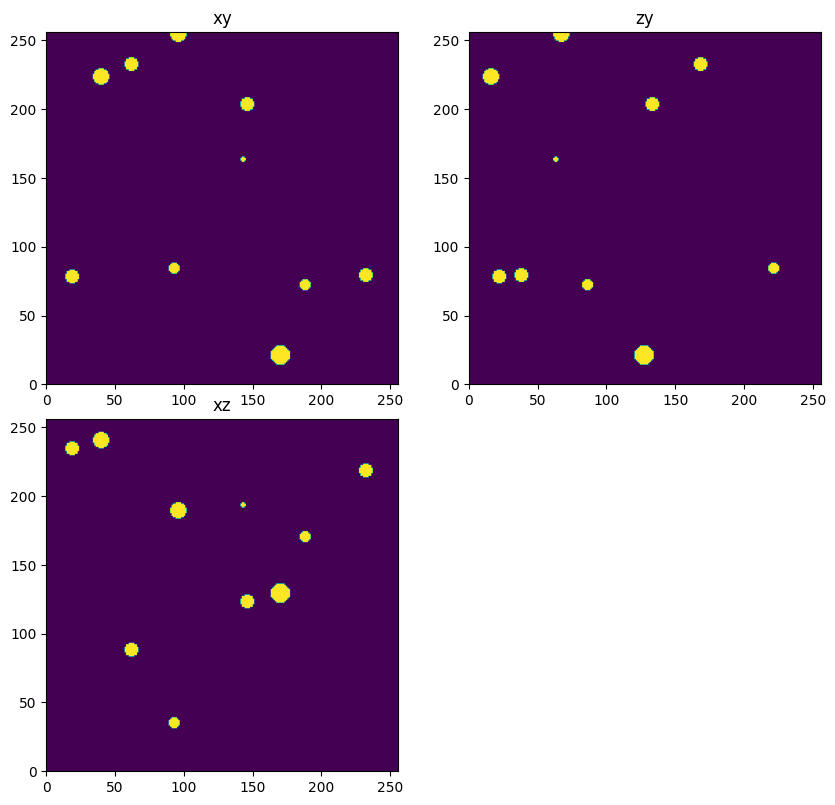

In [54]:
xdim=256
ydim=256
zdim=256

phantom = np.zeros([zdim,xdim,ydim], dtype=np.float32)

for i in range(0,10):
    x=random.randint(0,xdim)
    y=random.randint(0,ydim)
    z=random.randint(0,zdim)
    intensity = 200#random.randint(100,200) 

    print(x,y,z)

    r=random.randint(2,7)

    size = [2*r, 2*r, 2*r]
    sphere = rg.sphere(size, r).astype(np.float32)

    #add_sphere3d(phantom, 20, x, y, z, intensity, 2)
    add_small_to_large(phantom, intensity*sphere, x, y, z, True)

fig = show_xyz_max(phantom)

In [55]:
def ramp_3d(array, a, b, reverse=False):
    # Get the slice index range to apply the ramp to
    slice_range = range(a, b + 1)

    # Calculate the ramp values
    if reverse:
        ramp_values = np.linspace(1, 0, len(slice_range))
    else:
        ramp_values = np.linspace(0, 1, len(slice_range))

    # Set the ramp values in the slice range
    for i in range(a, b):
        array[i, :, :] = ramp_values[i]



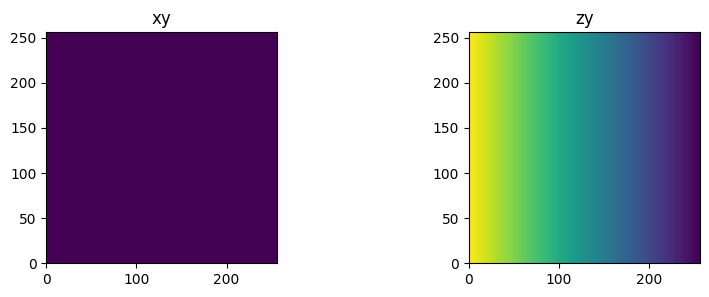

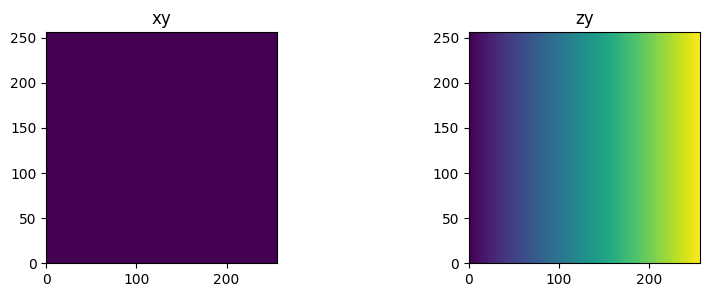

In [63]:
from tnia.plotting.projections import show_xy_zy_slice_center

ramp1=np.zeros_like(phantom)
ramp2=np.zeros_like(phantom)

ramp_3d(ramp1, 0, ramp1.shape[0], True)
ramp_3d(ramp2, 0, ramp2.shape[0])

fig = show_xy_zy_slice_center(ramp1)
fig = show_xy_zy_slice_center(ramp2)

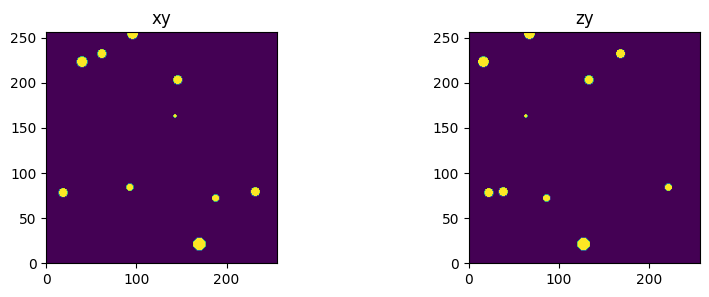

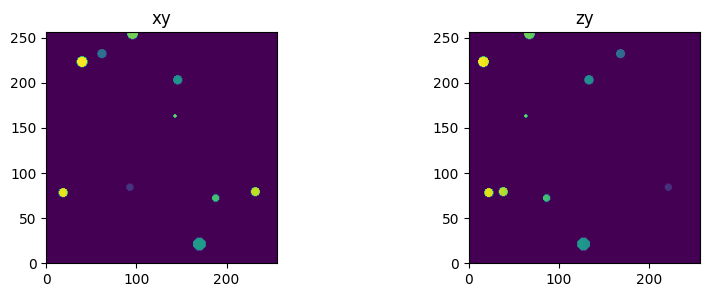

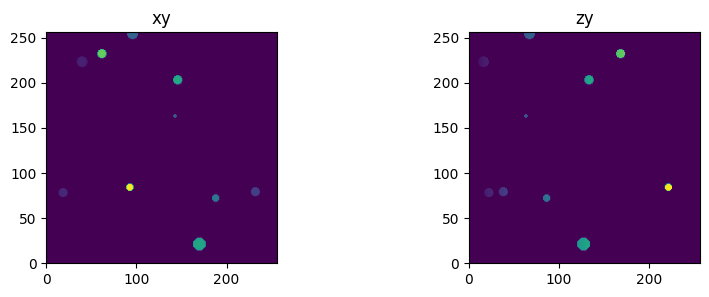

In [64]:
phantom_ramp1 = phantom * ramp1
phantom_ramp2 = phantom * ramp2

fig = show_xy_zy_max(phantom)
fig = show_xy_zy_max(phantom_ramp1)
fig = show_xy_zy_max(phantom_ramp2)

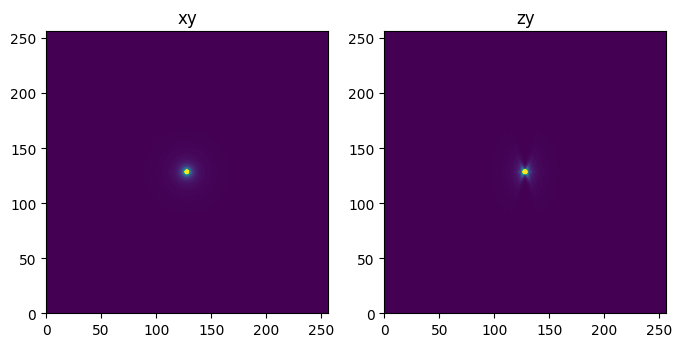

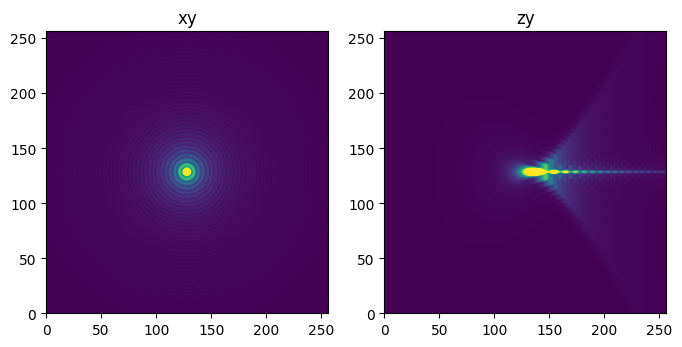

In [72]:
from tnia.nd.ndutil import centercrop
from tnia.deconvolution.psfs import gibson_lanni_3D
from tnia.plotting.projections import show_xy_zy_max
from tnia.deconvolution.psfs import recenter_psf_axial
from skimage.io import imsave

ni=1.518
ns= 1.33
NA=1.4
w=0.530

xy_spacing = 0.0645
z_spacing=.16

xy_psf_dim=256
z_compute_psf_dim=256

#depth to compute PSF at
d=0
psf1  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_compute_psf_dim, d, w, use_psfm=True)
psf1 = psf1/psf1.sum()
psf1 = psf1.astype('float32')

d=phantom.shape[0]*z_spacing#128*z_spacing
psf2  = gibson_lanni_3D(NA, ni, ns, xy_spacing, z_spacing, xy_psf_dim, z_compute_psf_dim, d, w, use_psfm=True)
psf2 = psf2/psf2.sum()
psf2 = psf2.astype('float32')

fig=show_xy_zy_max(psf1, vmax=psf1.max()/4, figsize=(8,4))
fig=show_xy_zy_max(psf2, vmax=psf2.max()/4, figsize=(8,4))

c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deconvolution\forward.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  return cp.asnumpy(field_imaged).astype('float32')


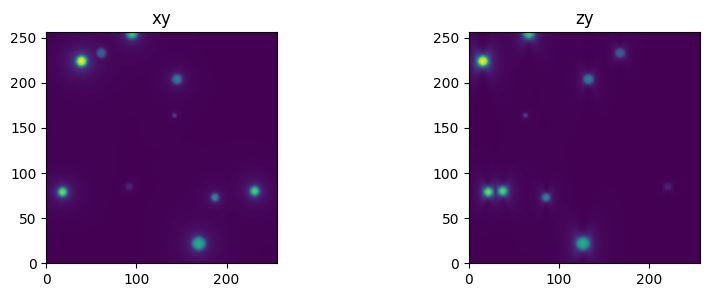

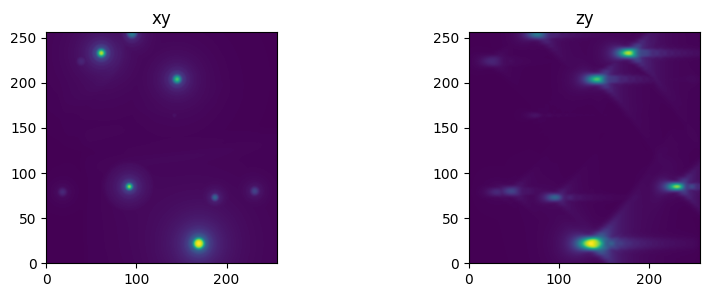

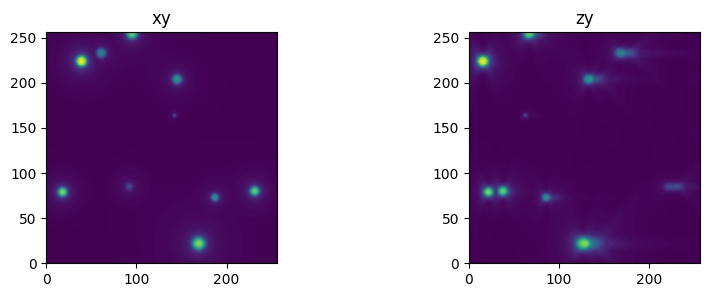

In [73]:
from tnia.deconvolution.forward import forward

forward1 = forward(phantom_ramp1, psf1, 0, False)
forward2 = forward(phantom_ramp2, psf2, 0, False)

forward = forward1 + forward2

fig = show_xy_zy_max(forward1)
fig = show_xy_zy_max(forward2)
fig = show_xy_zy_max(forward)

In [84]:
# random float between 0 and 1
# use list compreshension to make a random array
for i in range(0, 20):
    randoms = [random.uniform(0, 1)<.25 for i in range(0, 100)]
    print(sum(randoms)/len(randoms))

0.21
0.25
0.28
0.25
0.23
0.2
0.24
0.24
0.19
0.27
0.23
0.22
0.29
0.29
0.27
0.31
0.23
0.16
0.28
0.25
